In [94]:
import pandas as pd 
import sys
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pygal

In [124]:
### In this assignment I will try to improve my skills with matplotlib and seaborn###

In [20]:
# Defining fonts
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]

In [27]:
# Create costum color pallets

b_palette = ["#4e91ee", "#B2D4CD"]
bl_palette = ["#c3dbf0", "#ebf4f2"]
bm_palette = ["#dbe9f6", "#bad6eb", "#89bedc", "#73aad4", "#539ecd", "#2b7bba", "#00458a", "#112c47", "#001b36" ]
bms_palette = ["#89bedc", "#2b7bba",  "#001b36"]

In [28]:
# Variable Gender: 0 = male, 1 = female

# Variable Education: High school = 1, Technical Vocational Degree = 2, Bachelor = 3, Master = 4, Phd = 5

# Variable Studyfield: Humanities = 1, Social science = 2, Natural Science 3, 
# Formal Science = 4, Engineering = 5, Arts-Architecture = 6, Others = 7 

# Variable CountryUniversity: Austria = 1, German = 2, Mexican 3, Dutch 4, Italien 5, 
# Scottish 6, Norwegian 7, Spanish 8

# Variable Digital Literacy: Very Poor = 1, Poor = 2, Acceptable/Average = 3, Good = 4, Very Good = 5

# Variable Learning Mode: Hybrid Learning = 1, Face-to-Face = 2, Online = 3

# The following variables use Likert's scale - Very Poor = 1, Poor = 2, Acceptable/Average = 3, Good = 4, Very Good = 5
# OnlineLearningOutcome/OnlineEnthusiasm/OnlineOrganisationalStructure/
# OnlineStudentsInteraction/OnlineInstructorCommunication/OnlineAssesment/ 
# OnlineTransparancy 

# The following variables use Likert's scale - Strongly Disagree = 1, Disagree = 2, Neither Agree nor Disagree = 3, Agree = 4, Strongly Agree = 5
# ProblemsAdaptability/ProblemTechnicalIssue/ProblemTimemanagement/ProblemMotivation/
# ProblemPersonalFocus/ProblemImplementation/ProblemMisunderstanding/ProblemLackCommunity/ProblemBalance

In [125]:
# Read data file
pd.set_option("display.max_columns", 500)
df = pd.read_csv("/home/marin/Desktop/final_data3.csv")
print(df.head(45))

# Quick overview of data
df.describe()

df.groupby(["DigitalAbilities"]).mean()

    Response ID  Gender  Age                       Education  \
0             6    Male   30                   PhD or Doctor   
1             7  Female   24               Bachelor's degree   
2             8  Female   26      Master's degree or Mag.(a)   
3             9  Female   22               Bachelor's degree   
4            10  Female   23               Bachelor's degree   
5            11  Female   28               Bachelor's degree   
6            14    Male   26      Master's degree or Mag.(a)   
7            17  Female   26             High school diploma   
8            19  Female   27      Master's degree or Mag.(a)   
9            22    Male   28             High school diploma   
10           23  Female   28      Master's degree or Mag.(a)   
11           25  Female   26               Bachelor's degree   
12           26  Female   20             High school diploma   
13           27  Female   29  Technical or vocational degree   
14           28    Male   22            

,Response ID,Age
DigitalAbilities,,
Acceptable,36.500000,26.100000
Good,39.125000,25.062500
Poor,65.000000,29.000000
Very Good,47.090909,24.545455
Very Poor,22.000000,28.000000


In [47]:
# Numerical depiction for later tested values
df[["Age", "DigitalAbilities", "Gender"]].groupby("Gender").agg(["count","mean", "std"])

Age                     
       count       mean       std
Gender                           
Female    29  25.206897  3.233522
Male      10  25.800000  3.259175

In [59]:
## Non parametric test Digital Abilities per Gender
from scipy.stats import mannwhitneyu

# Select samples for DigitalAbilities grouped by Gender out of df 
df_da_m = df[df["Gender"] == 0]["DigitalAbilities"]
df_da_f = df[df["Gender"] == 1]["DigitalAbilities"]

# Describe digital Abilities for Gender
df[["Gender","DigitalAbilities"]].groupby("Gender").describe()

DigitalAbilities                       
                  count unique        top freq
Gender                                        
Female               29      4       Good   12
Male                 10      4  Very Good    4

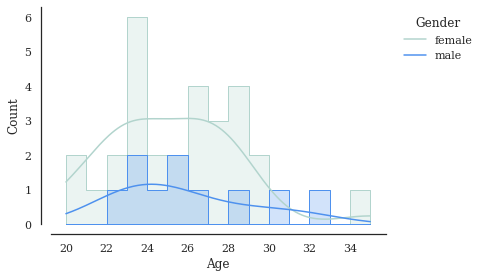

In [60]:
## Histogram for age 

h = sns.set(style="white", palette=b_palette, font="serif")
h = sns.histplot(data=df, x="Age", binwidth=1, kde=True, hue="Gender", element="step", legend=False)
h = plt.legend(title="Gender", loc="upper right", labels=["female", "male"], bbox_to_anchor=(1.29, 1), frameon=False)
h = sns.despine(top=True, right=True, offset=10)
plt.show(h)


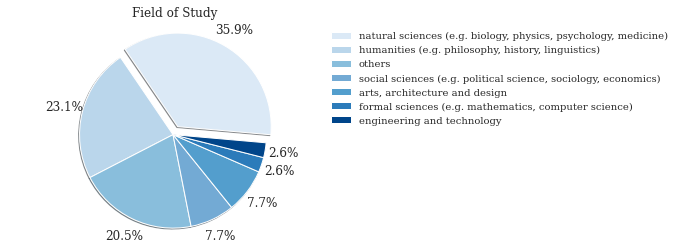

In [61]:
## Pie chart of field of study

p = sns.set(style="white", palette=bm_palette, font="serif")
df_SC = df['Studyfield'].value_counts()
p = plt.pie(df_SC, autopct='%.1f%%', shadow=True, pctdistance = 1.2, labeldistance = 1.2, radius=2.0, startangle=-5, explode=[0.2, 0, 0, 0, 0, 0, 0])
p = plt.axis('equal')
p = plt.title('Field of Study')
p = plt.legend(df_SC.index, loc=1, bbox_to_anchor=(2, 1), prop={'size': 10}, frameon=False)


plt.show()

Face-to-Face Learning    22
Hybrid Learning          14
Online Learning           3
Name: LearningMode, dtype: int64


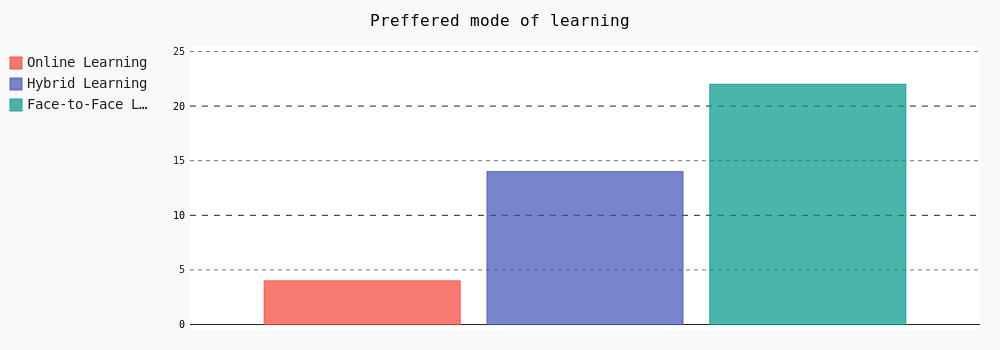

In [132]:
#Comparison of the whishes for mode of studying among studens

print(df["LearningMode"].value_counts())

#Bar chart

line_bar1 = pygal.Bar(width=1000, height = 350)
line_bar1.title = 'Preffered mode of learning'
line_bar1.y_labels = map(int, ["0","5","10","15","20","25"])
line_bar1.X_labels = map(str, ["Answers"])
line_bar1.add("Online Learning",[4])
line_bar1.add("Hybrid Learning",[14])
line_bar1.add("Face-to-Face Learning",[22])
line_bar1

In [121]:
# Comparison of Technical issues among students and their motivation


#First we count the given answers
print(df["ProblemTechnicalIssue"].value_counts())
print(df["ProblemMotivation"].value_counts())


#Then we check if there is a correlation between the two scales

table1 = df["ProblemTechnicalIssue"].value_counts()
table2 = df["ProblemMotivation"].value_counts()

correlation = table1.corr(table2)
print("The correlation index is: ",correlation)




Agree                        13
Neither agree or disagree    12
Strongly Agree                9
Disagree                      3
Strongly Disagree             2
Name: ProblemTechnicalIssue, dtype: int64
Agree                        14
Strongly Agree               13
Neither agree or disagree     9
Disagree                      2
Strongly Disagree             1
Name: ProblemMotivation, dtype: int64
The correlation index is:  0.9019452490277713


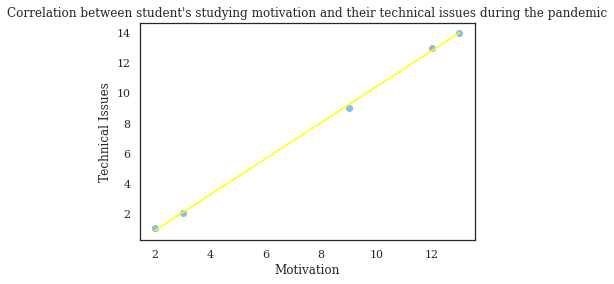

In [122]:
#Creating a chart to display the results

plt.scatter(table1, table2) 
plt.xlabel('Motivation')
plt.ylabel('Technical Issues')
plt.title("Correlation between student's studying motivation and their technical issues during the pandemic")
plt.plot(np.unique(table1), np.poly1d(np.polyfit(table1, table2, 1))(np.unique(table1)), color='yellow')
plt.show()